In [20]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 16px;
</style>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta  
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Read data

In [22]:
df = pd.read_csv('../data/2020 Presidency Ads.csv')
df.shape

(646594, 73)

In [23]:
df.head()

id     candidate       party ad_start_time ad_stop_time  \
0   410970492954853  Donald Trump  Republican      1/1/2020     1/1/2020   
1   622036635270778  Donald Trump  Republican      1/1/2020     1/1/2020   
2   835634293557758  Donald Trump  Republican      1/1/2020     1/2/2020   
3  2497528373857320  Donald Trump  Republican      1/1/2020     1/2/2020   
4   467605080836834  Donald Trump  Republican      1/2/2020     1/3/2020   

         page_name                            funding_entity  \
0  Donald J. Trump       DONALD J. TRUMP FOR PRESIDENT, INC.   
1  Donald J. Trump  TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE   
2  Donald J. Trump  TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE   
3  Donald J. Trump  TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE   
4  Donald J. Trump  TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE   

                                        ad_body_text        ad_link_caption  \
0  ¡RESERVA TU ENTRADA YA! Lanzamiento de Evangél...  www.donaldjtrump.com/   
1  Radical Democrats just voted to take away YOUR...       donaldjtrump.com   
2  Radical Democrats just voted to take away YOUR...       donaldjtrump.com   
3  Radical Democrats just voted to take away YOUR...       donaldjtrump.com   
4  We need to show Nancy and her corrupt Democrat...       donaldjtrump.com   

                 ad_link_description  ... South_Carolina South_Dakota  \
0  Obtén tu entrada gratuita aquí>>>  ...       0.000000     0.000000   
1                  ADD YOUR NAME >>>  ...       0.000000     0.000000   
2                  ADD YOUR NAME >>>  ...       0.000000     0.000000   
3              SHOW YOUR SUPPORT >>>  ...       0.000000     0.000000   
4                  ADD YOUR NAME >>>  ...       0.027273     0.009091   

   Tennessee     Texas      Utah  Vermont  Virginia  Washington  \
0   0.000000  0.000000  0.000000      0.0  0.000000    0.000000   
1   0.000000  0.000000  0.000000      0.0  0.000000    0.000000   
2   0.000000  0.666667  0.000000      0.0  0.000000    0.000000   
3   0.000000  0.333333  0.000000      0.0  0.000000    0.000000   
4   0.009091  0.100000  0.027273      0.0  0.009091    0.036364   

   West_Virginia   Wyoming  
0            0.0  0.000000  
1            0.0  0.000000  
2            0.0  0.000000  
3            0.0  0.000000  
4            0.0  0.009091  

[5 rows x 73 columns]

### Create a dataframe with unique ad text and corresponding mean impression values 

In [25]:
df['mean_impression'] = (df.impressions_lower + df.impressions_upper)/2
ad_freq = pd.DataFrame(df.groupby(['ad_body_text', 'party'], as_index=False)['mean_impression'].agg('sum'))
ad_freq['mean_impression'] = (ad_freq['mean_impression']).astype('int')
ad_freq.head()

ad_body_text       party  \
0  "'This cannot be a partisan moment,’ Joe Biden...  Democratic   
1  "A leader who has the character and the experi...  Democratic   
2  "A loyal and humble servant," Joe Biden leads ...  Democratic   
3  "Al endosar el Plan Biden para Puerto Rico, El...  Democratic   
4  "America has an obligation to uphold our promi...  Democratic   

   mean_impression  
0            84999  
1            14485  
2          8468932  
3           129496  
4            84999

Mean impression values by party

In [26]:
ad_freq.groupby('party').agg('sum')

mean_impression
party                      
Democratic       1935563443
Republican       3972758195

### Identify verbs from the text using POS tagging

In [28]:
from nltk import word_tokenize, pos_tag
from collections import defaultdict

unique_ads = df.ad_body_text.unique()
verbs = defaultdict(lambda:0)
for i in range(ad_freq.shape[0]):
    try:
        text = word_tokenize(ad_freq.ad_body_text[i])
        tags = pos_tag(text)
        for tag in tags:
            if 'VB' in tag[1]:
                verbs[tag[0].lower()] = verbs[tag[0].lower()] + (ad_freq.mean_impression[i])
    except:
        pass

### Identify verbs related to donation, sign up and filter ads requesting for donations and sign ups

In [29]:
from nltk import word_tokenize, pos_tag
from collections import defaultdict

unique_ads = df.ad_body_text.unique()
verbs = defaultdict(lambda:0)
ad_freq['donate'] = [0]*ad_freq.shape[0]
ad_freq['signup'] = [0]*ad_freq.shape[0]
for i in range(ad_freq.shape[0]):
    try:
        text = word_tokenize(ad_freq.ad_body_text[i])
        tags = pos_tag(text)
        for tag in tags:
            if tag[0].lower() in ['donate', 'chip', 'contribute', 'fundraising']:
                ad_freq.donate[i] = 1
            if tag[0].lower() in ['sign', 'join', 'register']:
                ad_freq.signup[i] = 1
    except:
        pass

<ipython-input-29-c3ebf68a997b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_freq.signup[i] = 1
<ipython-input-29-c3ebf68a997b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_freq.donate[i] = 1


In [30]:
ad_freq.donate = ad_freq.donate * ad_freq.mean_impression
ad_freq.signup = ad_freq.signup * ad_freq.mean_impression


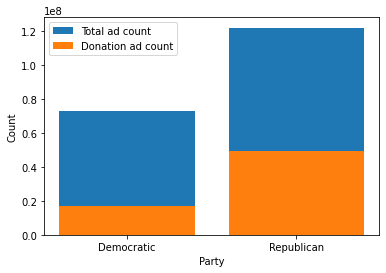

In [41]:
plt.bar(x=ad_freq.party, height=ad_freq.mean_impression, label='Total ad count')
plt.bar(x=ad_freq.party, height=ad_freq.donate, label='Donation ad count')
plt.xlabel('Party')
plt.ylabel('Count')
plt.legend()
plt.show()

In [42]:
plt.bar(x=ad_freq.party, height=ad_freq.mean_impression, label='Total ad count')
plt.bar(x=ad_freq.party, height=ad_freq.signup, label='Signup ad count')
plt.xlabel('Party')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
adjectives = []
for i in unique_ads:
    try:
        text = word_tokenize(i)
        tags = pos_tag(text)
        for tag in tags:
            if 'JJ' in tag[1]:
                adjectives.append(tag[0])
    except:
        pass

### Filter the democratic primary election ads (ads published before June 6th 2020) to analyze if the candidates target each other before the primary election results are announced

In [34]:
dem_primary = df[df.apply(lambda x: datetime.strptime(x.ad_start_time, '%m/%d/%Y')<datetime.strptime('6/6/2020', '%m/%d/%Y'), axis=1)]
dem_primary = dem_primary[dem_primary.party=='Democratic']
dem_primary = dem_primary.reset_index(drop=True)
dem_primary.shape

(9930, 74)

In [13]:
!python3 --version

Python 3.9.1


### Helper function to identify entities in the ad text, specifically mentions about people, organizations and places

In [35]:
import spacy 


nlp = spacy.load('/Users/ashwinimarathe/opt/anaconda3/envs/capstone/lib/python3.9/site-packages/en_core_web_sm/en_core_web_sm-2.3.1') 

def perform_ner(row):
    sentence = str(row.ad_body_text)
    doc = nlp(sentence) 
    for ent in doc.ents: 
        if ent.label_=='PERSON':
            row['person'] = row['person'] + ',' +(ent.text)
        if ent.label_=='ORG':
            row['org'] = row['org'] + ',' + (ent.text)
        if ent.label_=='PLACE':
            row['place'] = row['place'] + ',' + (ent.text)
    return row

In [36]:
ads = pd.DataFrame(dem_primary.ad_body_text.unique(), columns = ['ad_body_text'])
ads['person'] = ""
ads['org'] = ""
ads['place'] = ""
ads.apply(perform_ner, axis=1)
ads['person'] = ads['person'].apply(lambda x: x.split(',')[1:])
ads['org'] = ads['org'].apply(lambda x: x.split(',')[1:])
ads['place'] = ads['place'].apply(lambda x: x.split(',')[1:])
ads.head()

ad_body_text  \
0  Joe Biden is headed to Davenport. Join us on S...   
1  "I lost my first wife and our one-year-old dau...   
2  Joe Biden is headed to Grinnell. Join us on Su...   
3  Joe Biden is headed to Vinton. Join us on Satu...   
4  Joe Biden is headed to Davenport. Join us on S...   

                              person                          org place  
0                   [Joe Biden, Joe]                           []    []  
1                 [Obama, Joe Biden]                  [Obamacare]    []  
2  [Joe Biden, Abby Finkenauer, Joe]   [Grinnell, Hotel Grinnell]    []  
3  [Joe Biden, Abby Finkenauer, Joe]  [Tilford Elementary School]    []  
4  [Joe Biden, Abby Finkenauer, Joe]                           []    []

In [37]:
ads.ad_body_text.nunique()

300

### List of democrats who ran for primary elections

In [38]:
flatten = lambda t: [item for sublist in t for item in sublist]
person_mentions = set(flatten(list(ads.person)))
democrat_politicians = ['Amy Klobuchar', 'Beto', "Beto O'Rourke",
                        'BERNIE SANDERS', 'Bernie', 'Cory Booker',
                        'Elizabeth Warren', 'John Delaney', 'Kamala Harris',
                        'Pete Buttigieg', "Sander'", 'Bernie Sanders'
                       ]
count = 1
for i, row in (ads.iterrows()):
#     print(row.person)
    if (bool(set(row.person) & set(democrat_politicians))):
        print(f"{count}. {row.ad_body_text}\n\n")
        count += 1
        
    
# pd.options.display.max_colwidth = None
# ads[ads.person.isin(democrat_politicians)]

1. BREAKING: The New York Times is reporting that Trump trails Joe Biden in key battlegrounds like Pennsylvania and Florida, but LEADS Elizabeth Warren and Bernie Sanders in those pivotal states.

Our country can’t take another four years of Trump. It’s clear that Joe is our country’s best chance to take back the White House in 2020, but we can’t beat Trump without the urgent support of grassroots donors like you. Will you rush a donation right now to make sure we reach our $10,000 goal before our midnight deadline to elect Joe Biden and defeat Trump next November?


2. "Joe Biden scored the endorsement Saturday of a major transit union that officially backed Bernie Sanders in 2016.

The 200,000-member-strong Amalgamated Transit Union cited Biden’s electability against President Trump.

The issue of Biden’s electability was the driving force behind the decision and a key concern of the union’s membership" - Politico


3. BREAKING: Joe has the best shot to take on Trump, but we got outr

### Ads run by Joe Biden that mention Kamala Harris

In [39]:
for i in list(ads.ad_body_text):
    i = str(i)
    if ('kamala' in i.lower()) or ('harris' in i.lower()):
        print(i)



BREAKING: KAMALA HARRIS ENDORSES JOE BIDEN. Sen. Kamala Harris is the latest US Senator and former presidential candidate to join Team Joe. She knows that Joe Biden is our best chance to get Donald Trump out of the White House this November.

After decisive victories across the country on Super Tuesday and more than 70 nationwide polls that show Joe beating Trump, our campaign has all the momentum right now. But our fundraising needs to pick up immediately if we’re going to beat Bernie first.

We URGENTLY need to close our $1,027 fundraising gap before midnight tonight if we’re going to make sure that Joe is on the ballot against Trump. With Bernie outraising and outspending us in key states during this critical final push, every dollar matters more than ever: Will you rush a donation now to make sure Joe Biden defeats Donald Trump in November?
BREAKING: KAMALA HARRIS ENDORSES JOE BIDEN. Sen. Kamala Harris, US Senator and former presidential candidate, has just joined Team Joe. She kno